In [1]:
import io, os, sys, types
from IPython import get_ipython
from Utils import NotebookFinder
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
#import Test_model
from Test_model import evaluation
import Train_model 
import matplotlib.pyplot as plt


importing Jupyter notebook from Test_model.ipynb
importing Jupyter notebook from model.ipynb
importing Jupyter notebook from Train_model.ipynb


In [2]:
global features_train 
global features_test 
global labels_train 
global labels_test
width = 0.3

In [3]:
# def next_batch(Iteration,flag,batch_size):  
#     start_train = Iteration*batch_size
#     start_test = Iteration*batch_size
#     features_train=run.features_train
#     labels_train = run.labels_train
#     features_test = run.features_test
#     labels_test =run.labels_test
#     print(labels_train.shape)
#     print(labels_test.shape)
#     if flag == 1: 
#         Length_train = len(labels_train)
#         if start_train== 0 and Iteration == 0:
#             index_train = [ i for i in range(0,Length_train)]  
#             np.random.shuffle(index_train)
#             features_train = features_train[index_train]
#             labels_train = labels_train[index_train]
#         if start_train + batch_size > Length_train: 
#             rest_num_examples = Length_train - start_train
#             features_rest_part = features_train[start_train:Length_train]
#             labels_rest_part = labels_train[start_train:Length_train]
#             index_train = [ i for i in range(0,Length_train) ]  
#             np.random.shuffle(index_train) 
           
#             features_train= features_train[index_train]
#             labels_train = labels_train[index_train]
#             start_strain = 0
#             Sequence_index_train = batch_size - rest_num_examples
#             end_train = Sequence_index_train
#             features_new_part = features_train[start_train:end_train]
#             labels_new_part = labels_train[start_train:end_train]
            
#             return np.concatenate((features_rest_part, features_new_part), axis=0), np.concatenate(
#                     (labels_rest_part, labels_new_part), axis=0)
#         else:
#             Sequence_index_train += batch_size
#             end_train = Sequence_index_train
#             return features_train[start_train:end_train],labels_train[start_train:end_train]
#     elif flag == 0:
#         print(labels_train.shape)
#         print(labels_test.shape)
#         Length_test =  len(labels_test)
#         if Iteration== 0 :
#             index_test = [ i for i in range(0,Length_test)]  
#             np.random.shuffle(index_test)
#             features_test = features_test[index_test]
#             labels_test = labels_test[index_test]
#             Sequence_index_test = 0
            
#         Sequence_index_test += batch_size
#         end_test = Sequence_index_test   
        
#         return features_test[start_test:end_test],labels_test[start_test:end_test]

In [4]:
def run_main():
    datasets = pd.read_csv("data2/data_total3.csv") 
    features = datasets.iloc[:,:-1]
    labels =  datasets.iloc[:,-1]
    skf = StratifiedKFold(n_splits=10)
    Test_accuracy_Epo = []
    Accuracy_value_Epo = []
    Accuracy_value_all = []
    Loss_value_all = []
    AccofB_test = []
    AccofA_test = []
    classes = ["BENIGN","ATTACK"]
    epoch = 0
    for train_index, test_index in skf.split(features, labels):  
        features_train = features.iloc[train_index]
        features_test =  features.iloc[test_index]
        labels_train = labels.iloc[train_index]
        labels_test =  labels.iloc[test_index]
        features_train = features_train.values
        labels_train = labels_train.values
        features_test = features_test.values
        labels_test = labels_test.values
        labels_train = labels_train.reshape(len(labels_train))
        labels_test = labels_test.reshape(len(labels_test))
        print(labels_train.shape)
        print(labels_test.shape)
        Accuracy_value,acc,Loss_value,Epoch_accracy = Train_model.train(features_train,labels_train)
        Accuracy_value_Epo.append(Epoch_accracy)
        Accuracy_value_all.extend(Accuracy_value)
        Loss_value_all.extend(Loss_value)

        plt.figure(figsize=(20, 10))
        plt.plot(range(Train_model.Iteration*(epoch+1)), Accuracy_value_all)
        plt.xlabel('training step')
        plt.ylabel('accuracy value')
        plt.title('the accuracy value of training data')
        plt.savefig('model_folder/results/accuracy.png')
        plt.show()

        plt.figure()
        plt.plot(range(Train_model.Iteration*(epoch+1)), Loss_value_all)
        plt.xlabel('training value')
        plt.ylabel('loss value')
        plt.title('the value of the loss function of the training data')
       # plt.savefig('model_folder/results/loss.png')
        plt.show()

        plt.figure()
        plt.plot(range(epoch+1),Accuracy_value_Epo)
        plt.xlabel('Epoch')
        plt.ylabel('accracy')
        plt.title('Epoch accuracy')
       # plt.savefig('model_folder/results/Epoch_accuracy.png')
        plt.show()

        plt.figure()
        plt.plot(classes, acc)
        plt.ylabel('accuracy')
        plt.xlabel('classification')
        plt.title('Accuracy of each classification')
        #plt.savefig('model_folder/results/Accuracy_of_each_classification.png')
        plt.show()

        precision,accBA =evaluation(features_test,labels_test)
        Test_accuracy_Epo.append(precision)
        AccofB_test.append(accBA[0])
        AccofA_test.append(accBA[1])
        plt.figure()
        plt.plot(range(epoch+1),Test_accuracy_Epo)
        plt.ylabel('Test_accuracy')
        plt.xlabel('Epoch')
        plt.title('Test_accuracy')
       # plt.savefig('model_folder/results/test_accuracy.png')
        plt.show()

        y = list(range(0,epoch+1))
        plt.bar(x=range(epoch+1), height = AccofB_test, width=width, label='BENIGN',color = 'steelblue',alpha = 0.8)  
        plt.bar(x=np.arange(epoch+1)+width,height = AccofA_test, width=width, label='Attack',color = 'indianred',alpha = 0.8)  
        plt.xticks(np.arange(len(y))+width/2, y)
        plt.ylabel('Test_accuracyofclasses')
        plt.xlabel('Epoch')
        plt.title('Test_accuracyofclasses')
        plt.legend()  
       # plt.savefig('model_folder/results/test_accuracyofclasses.png')
        plt.show() 
        epoch += 1
    average_train_accracy=model.Epoch_accuracy_mean(Epoch_accracy)
    print("average_train_accracy is:",average_train_accracy)
    average_test_accracy=model.Epoch_accuracy_mean(Test_accuracy_Epo)
    print("average_test_accracy is:",average_test_accracy)

(1004885,)
(111655,)


W1212 15:17:19.207641 140365706471232 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1212 15:17:19.228688 140365706471232 deprecation.py:323] From <string>:26: flatten (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.flatten instead.
W1212 15:17:19.485996 140365706471232 deprecation.py:506] From <string>:35: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W1212 15:17:19.630569 140365

index: 0  loss_value: 1.9210149  accuracy_value: 0.5
index: 1000  loss_value: 1.1832995  accuracy_value: 0.953125
index: 2000  loss_value: 1.114623  accuracy_value: 0.984375
index: 3000  loss_value: 1.1219095  accuracy_value: 0.984375
index: 4000  loss_value: 1.0891309  accuracy_value: 1.0
index: 5000  loss_value: 1.1144111  accuracy_value: 0.96875
index: 6000  loss_value: 1.1049738  accuracy_value: 0.96875
index: 7000  loss_value: 1.0838364  accuracy_value: 0.984375
index: 8000  loss_value: 1.3536482  accuracy_value: 0.96875
index: 9000  loss_value: 1.0649314  accuracy_value: 0.984375
index: 10000  loss_value: 1.1185405  accuracy_value: 0.984375
index: 11000  loss_value: 1.0508426  accuracy_value: 1.0
index: 12000  loss_value: 1.0479156  accuracy_value: 1.0
index: 13000  loss_value: 1.0907515  accuracy_value: 0.984375
index: 14000  loss_value: 1.1197532  accuracy_value: 0.96875
index: 15000  loss_value: 1.0588572  accuracy_value: 0.984375
[0.9734934691034923, 0.9768205640129773]


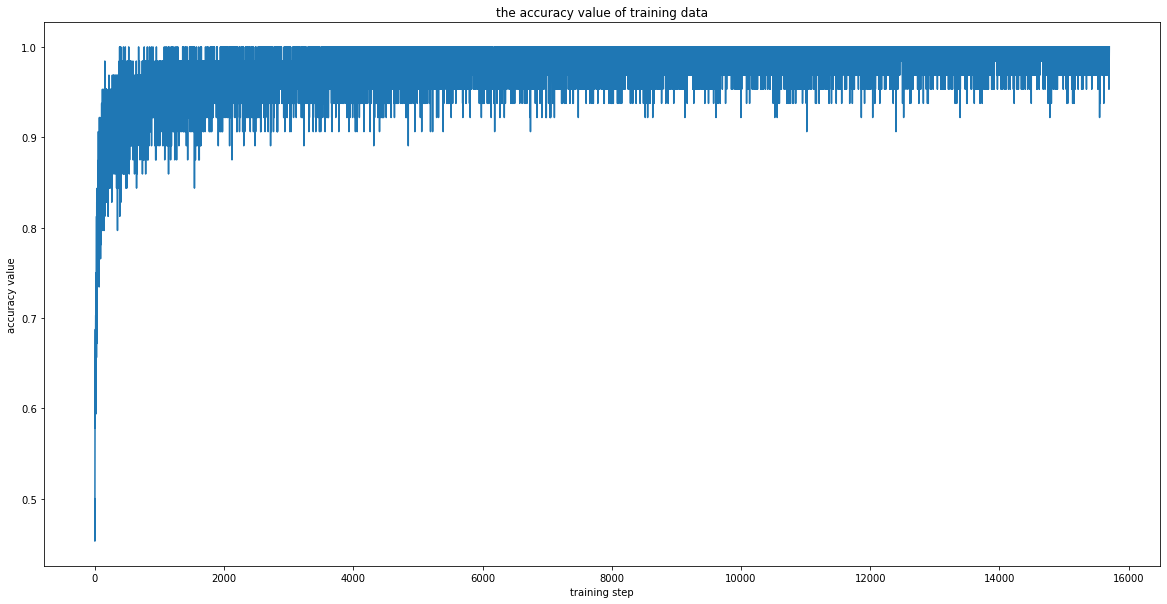

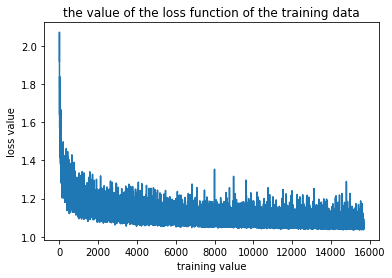

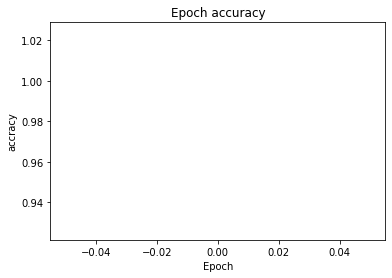

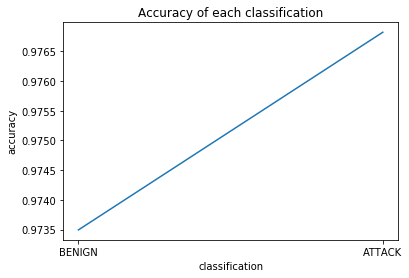

W1212 15:23:32.532150 140365706471232 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
W1212 15:23:32.568395 140365706471232 deprecation.py:323] From <string>:30: start_queue_runners (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W1212 15:23:32.569679 140365706471232 queue_runner_impl.py:471] `tf.train.start_queue_runners()` was called when no queue runners were defined. You can safely remove the call to this deprecated function.


confusion matrix in tensorflow: 


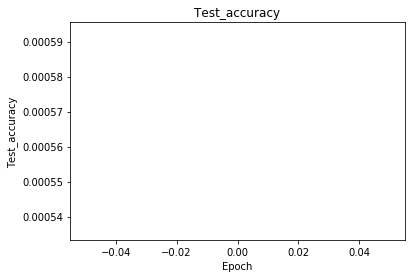

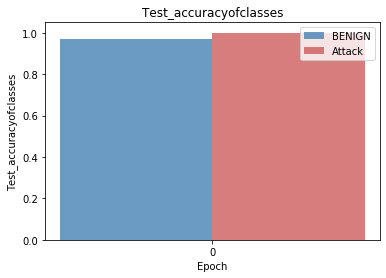

(1004886,)
(111654,)
index: 0  loss_value: 2.8084948  accuracy_value: 0.6818182
index: 1000  loss_value: 2.243638  accuracy_value: 0.921875
index: 2000  loss_value: 2.1411119  accuracy_value: 1.0
index: 3000  loss_value: 2.1615393  accuracy_value: 0.953125
index: 4000  loss_value: 2.1417432  accuracy_value: 1.0
index: 5000  loss_value: 2.136675  accuracy_value: 1.0
index: 6000  loss_value: 2.1349769  accuracy_value: 1.0
index: 7000  loss_value: 2.144862  accuracy_value: 0.984375
index: 8000  loss_value: 2.2244818  accuracy_value: 0.953125
index: 9000  loss_value: 2.1589324  accuracy_value: 0.96875
index: 10000  loss_value: 2.1455042  accuracy_value: 0.984375
index: 11000  loss_value: 2.0903819  accuracy_value: 1.0
index: 12000  loss_value: 2.1061652  accuracy_value: 0.984375
index: 13000  loss_value: 2.194874  accuracy_value: 0.953125
index: 14000  loss_value: 2.0890906  accuracy_value: 1.0
index: 15000  loss_value: 2.1480377  accuracy_value: 0.984375
[0.9739688952207852, 0.97433752356

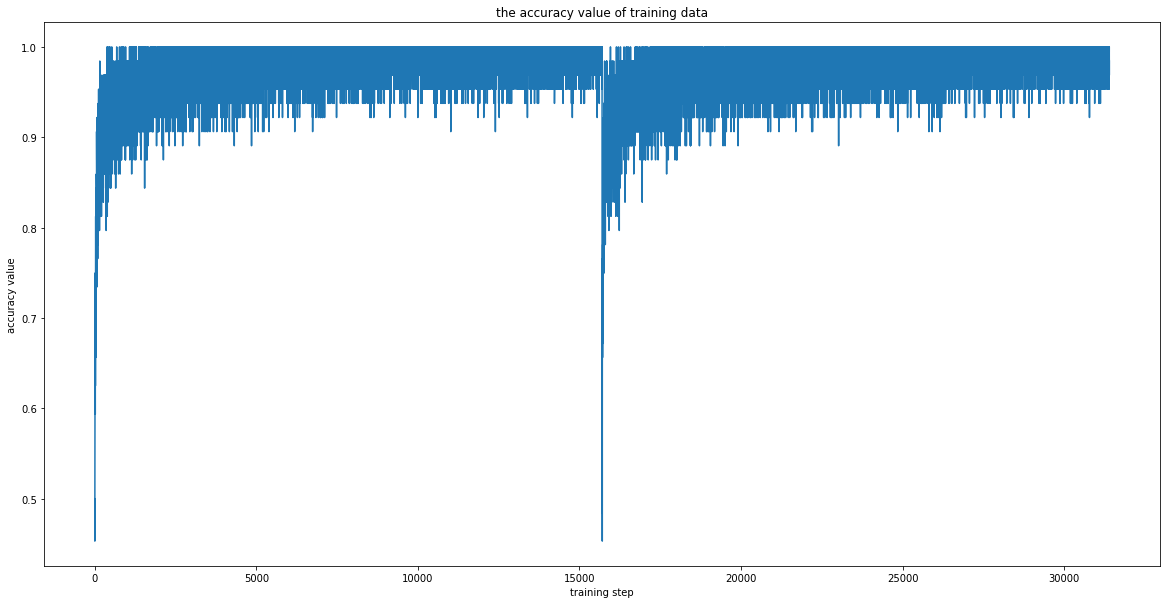

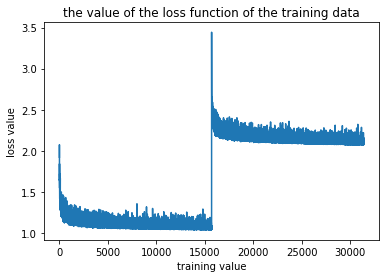

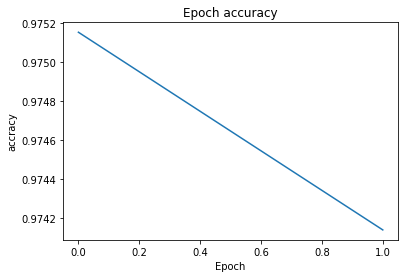

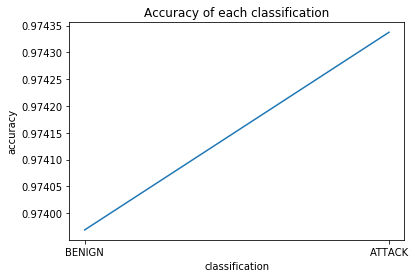

W1212 15:30:11.711638 140365706471232 queue_runner_impl.py:471] `tf.train.start_queue_runners()` was called when no queue runners were defined. You can safely remove the call to this deprecated function.


confusion matrix in tensorflow: 


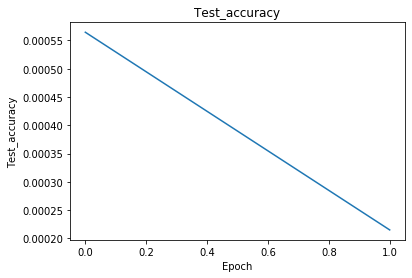

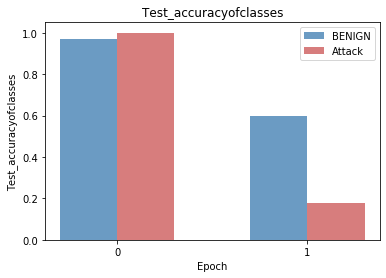

(1004886,)
(111654,)
index: 0  loss_value: 3.7759593  accuracy_value: 0.75
index: 1000  loss_value: 3.2493467  accuracy_value: 0.96875
index: 2000  loss_value: 3.1857986  accuracy_value: 0.984375
index: 3000  loss_value: 3.183586  accuracy_value: 0.984375
index: 4000  loss_value: 3.2494082  accuracy_value: 0.953125
index: 5000  loss_value: 3.1701255  accuracy_value: 1.0
index: 6000  loss_value: 3.168112  accuracy_value: 0.984375
index: 7000  loss_value: 3.257254  accuracy_value: 0.96875
index: 8000  loss_value: 3.1577573  accuracy_value: 0.984375
index: 9000  loss_value: 3.1599166  accuracy_value: 0.96875
index: 10000  loss_value: 3.1583245  accuracy_value: 1.0
index: 11000  loss_value: 3.1578698  accuracy_value: 0.984375
index: 12000  loss_value: 3.1819723  accuracy_value: 0.984375
index: 13000  loss_value: 3.1130376  accuracy_value: 1.0
index: 14000  loss_value: 3.1155694  accuracy_value: 1.0
index: 15000  loss_value: 3.1147988  accuracy_value: 1.0
[0.9749347227402957, 0.976579346697

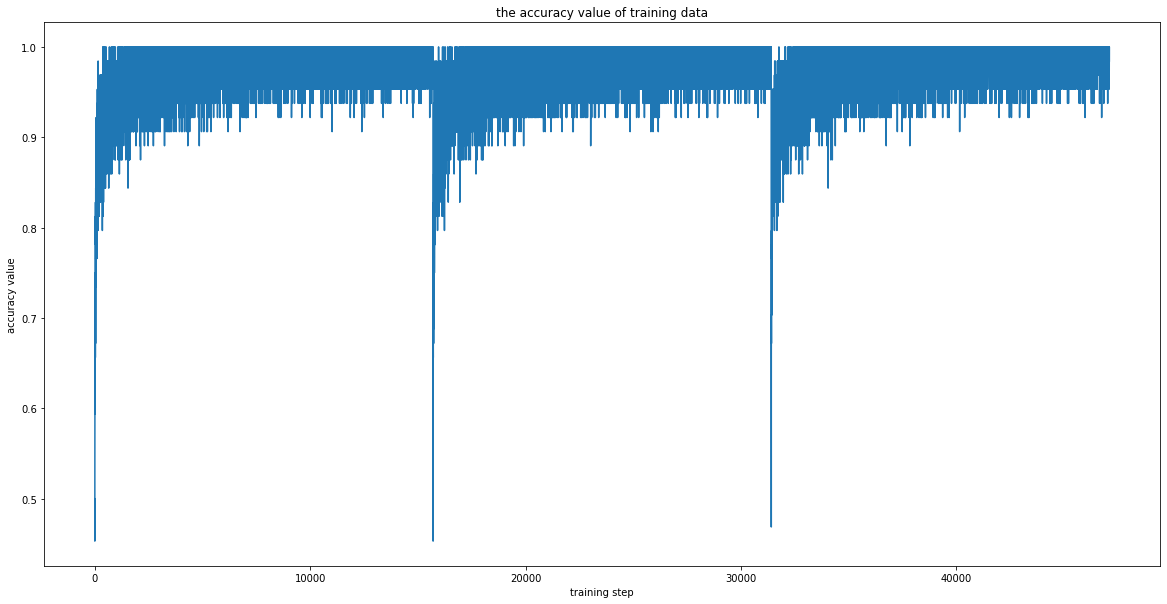

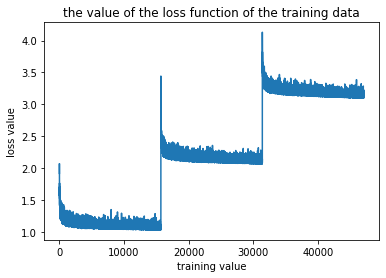

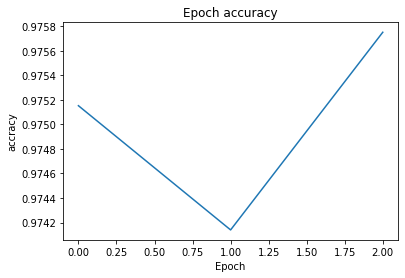

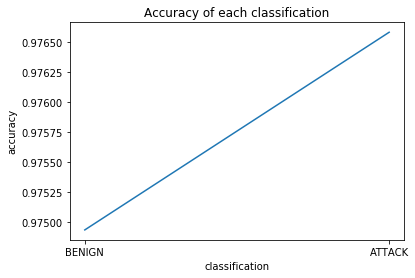

W1212 15:38:32.165684 140365706471232 queue_runner_impl.py:471] `tf.train.start_queue_runners()` was called when no queue runners were defined. You can safely remove the call to this deprecated function.


confusion matrix in tensorflow: 


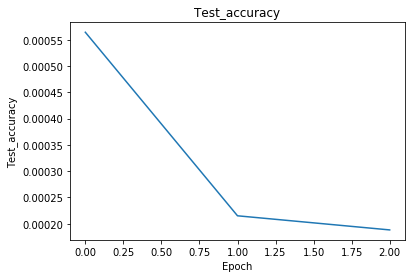

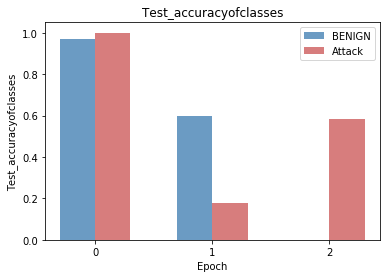

(1004886,)
(111654,)
index: 0  loss_value: 5.041207  accuracy_value: 0.515625


KeyboardInterrupt: 

In [5]:
if __name__ == '__main__':
    run_main()